NB Iris Tutorial
Converted to Python by Matthew Pecsok from Dr. Olivia Sheng's original tutorial in R
June 12, 2021

1 Data description

2 Library Setup

3 Overall data inspection

4 NB model building using sklearn package

5 Explanatory data exploration

6 Generate performance metrics

7 Simple hold-out evaluation


# 1 Data description


This is perhaps the best known database to be found in the pattern recognition literature.The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Target variable: class of iris plant.

Number of Instances: 150 (50 in each of three classes)

Number of Attributes: 4 numeric, predictive attributes and the class variable

Attribute Information: 1. sepal length in cm 2. sepal width in cm 3. petal length in cm 4. petal width in cm 5. class: Iris Setosa, Iris Versicolour, Iris Virginica


# 2 Library Setup

https://scikit-learn.org/stable/modules/naive_bayes.html

In [1]:
import pandas as pd
import numpy as np


from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn import metrics

# Package loading. Install the following packages before running this chunk or knitting this program.

#library(e1071)
#library(psych)
#library(caret)
## Loading required package: lattice
## Loading required package: ggplot2
## 
## Attaching package: 'ggplot2'
## The following objects are masked from 'package:psych':
## 
##     %+%, alpha
#library(rminer)
#library(rmarkdown)
#library(tictoc) 
#tic()

# 3 overall data inspection

In [2]:
iris_bunch = load_iris()

In [3]:
type(iris_bunch)

sklearn.utils.Bunch

https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html

In [4]:
iris = iris_bunch.data

In [5]:
iris.shape

(150, 4)

In [6]:
type(iris)

numpy.ndarray

In [7]:
iris_bunch.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

tranform the data from a numpy array and a list into a pandas dataframe for exploratory data analyisi

In [8]:
iris_df = pd.DataFrame(iris,columns=iris_bunch.feature_names)
iris_df['species'] = iris_bunch.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [9]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [10]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# 4 NB model building using sklearn package

In [11]:
gnb = GaussianNB()
y_pred = gnb.fit(iris_df.drop('species',axis=1), iris_df['species']).predict(iris_df.drop('species',axis=1))
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# 5 Explanatory data exploration

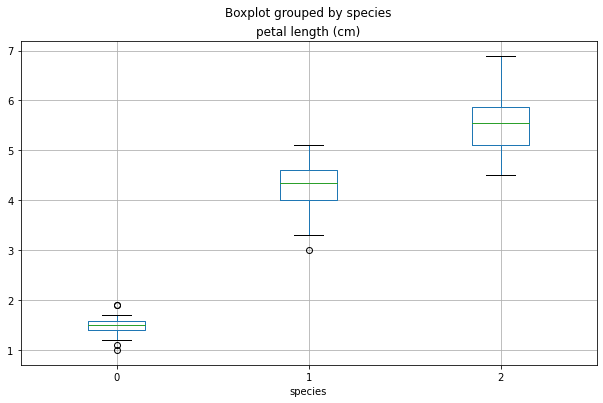

In [12]:
fig, ax = plt.subplots(figsize=(10,6))
iris_df.boxplot(column='petal length (cm)',by='species',ax=ax)
plt.show()

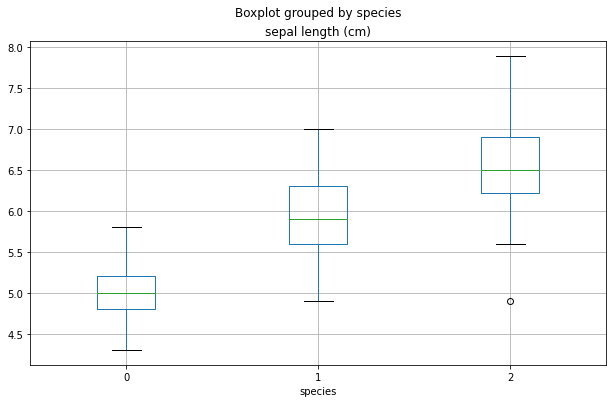

In [13]:
fig, ax = plt.subplots(figsize=(10,6))
iris_df.boxplot(column='sepal length (cm)',by='species',ax=ax)
plt.show()

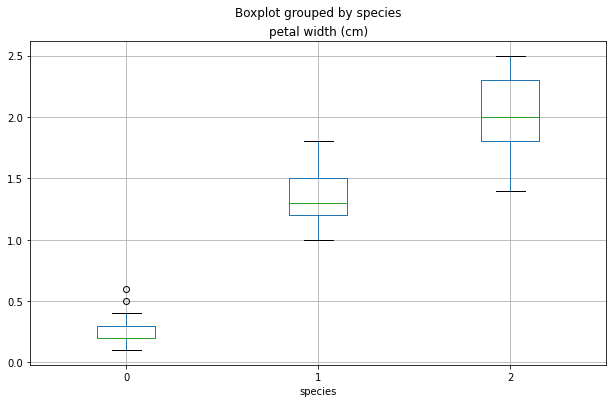

In [14]:
fig, ax = plt.subplots(figsize=(10,6))
iris_df.boxplot(column='petal width (cm)',by='species',ax=ax)
plt.show()

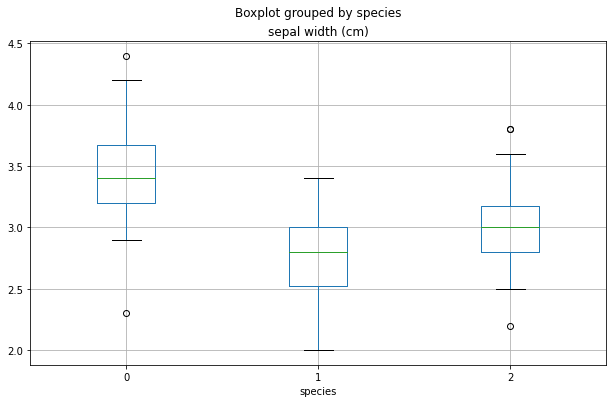

In [15]:
fig, ax = plt.subplots(figsize=(10,6))
iris_df.boxplot(column='sepal width (cm)',by='species',ax=ax)
plt.show()

In [16]:
iris_df[iris_df['species']==1].agg('describe')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,50.000000,50.000000,50.000000,50.000000,50.0
mean,5.936000,2.770000,4.260000,1.326000,1.0
std,0.516171,0.313798,0.469911,0.197753,0.0
min,4.900000,2.000000,3.000000,1.000000,1.0
25%,5.600000,2.525000,4.000000,1.200000,1.0
50%,5.900000,2.800000,4.350000,1.300000,1.0
75%,6.300000,3.000000,4.600000,1.500000,1.0
max,7.000000,3.400000,5.100000,1.800000,1.0


In [17]:
iris_df[iris_df['species']==2].agg('describe')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,50.00000,50.000000,50.000000,50.00000,50.0
mean,6.58800,2.974000,5.552000,2.02600,2.0
std,0.63588,0.322497,0.551895,0.27465,0.0
min,4.90000,2.200000,4.500000,1.40000,2.0
25%,6.22500,2.800000,5.100000,1.80000,2.0
50%,6.50000,3.000000,5.550000,2.00000,2.0
75%,6.90000,3.175000,5.875000,2.30000,2.0
max,7.90000,3.800000,6.900000,2.50000,2.0


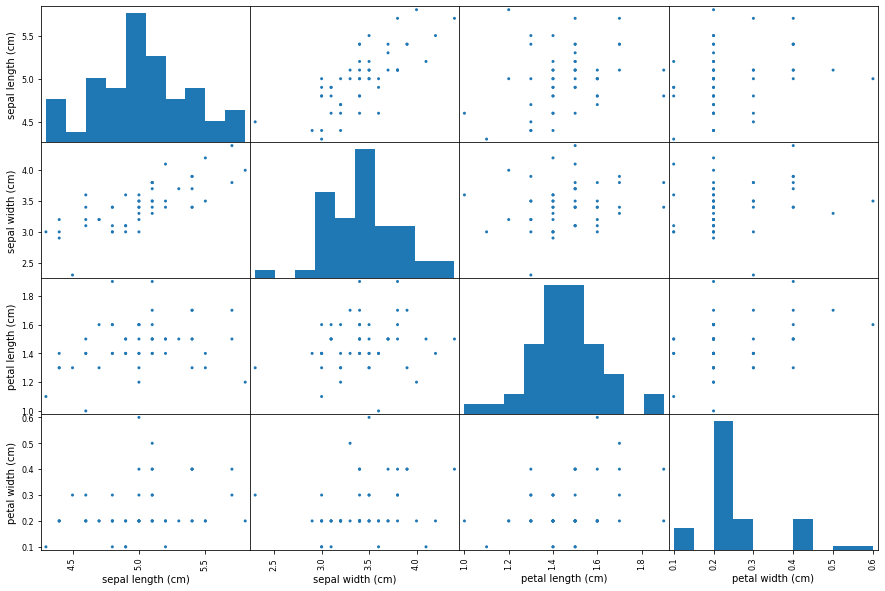

In [18]:
pd.plotting.scatter_matrix(iris_df[iris_df['species']==0].drop('species',axis=1),figsize=(15, 10),alpha=1)
plt.show()

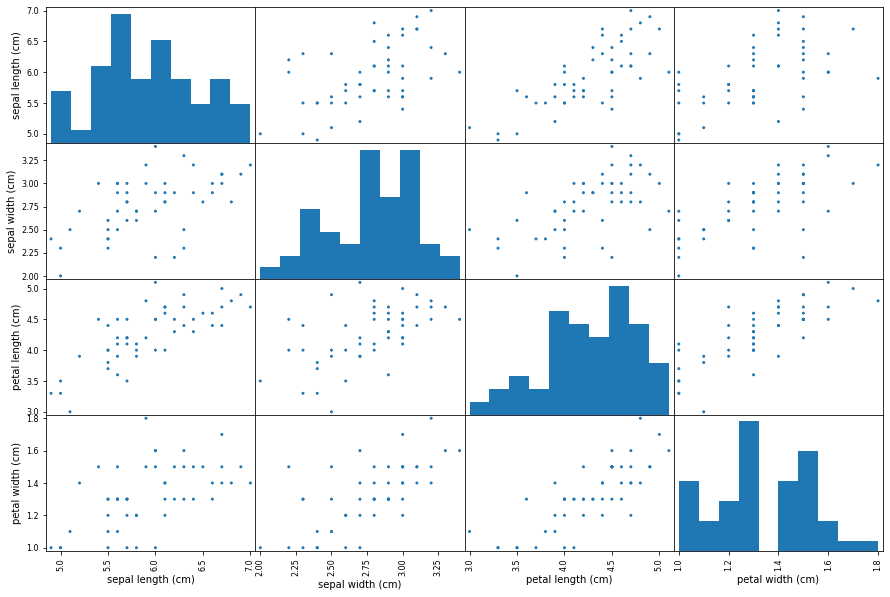

In [19]:
pd.plotting.scatter_matrix(iris_df[iris_df['species']==1].drop('species',axis=1),figsize=(15, 10),alpha=1)
plt.show()

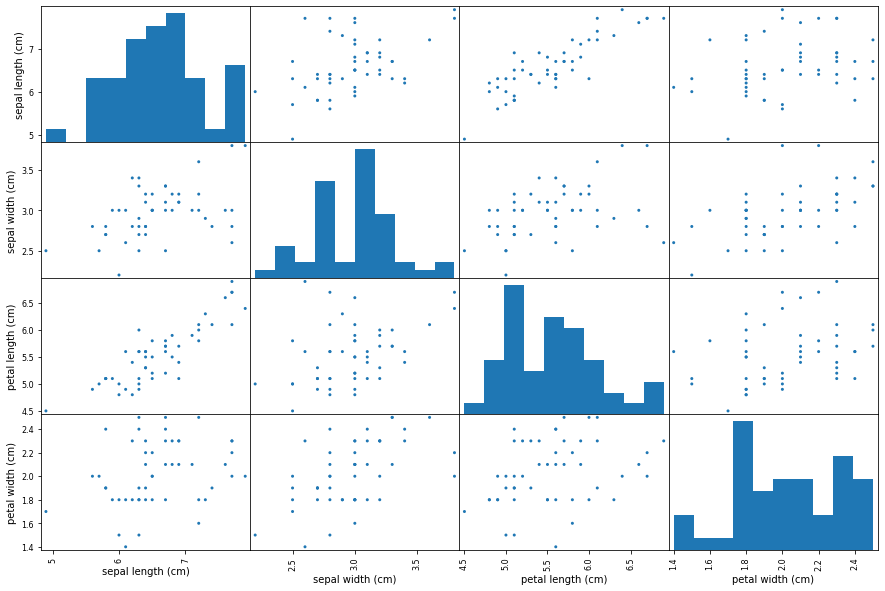

In [20]:
pd.plotting.scatter_matrix(iris_df[iris_df['species']==2].drop('species',axis=1),figsize=(15, 10),alpha=1)
plt.show()

# 6 Simple hold-out evaluation

In [21]:
X_train, X_test, y_train, y_test = train_test_split(iris_df.drop('species',axis=1), iris_df['species'], test_size=0.4, random_state=0,stratify=iris_df['species'])

It's worth noting here that we used the stratify=target argument to the split function to make sure that each target class is represented at the same proportion in the test and train set. sklearn does NOT do this by default, while in R createdatapartition does. 

In [22]:
X_train.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,90.000000,90.000000,90.000000,90.000000
mean,5.855556,3.046667,3.763333,1.184444
std,0.856320,0.462091,1.795966,0.752212
min,4.300000,2.000000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.275000,5.100000,1.800000
max,7.900000,4.400000,6.700000,2.400000


In [23]:
X_test.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,60.000000,60.000000,60.000000,60.000000
mean,5.825000,3.073333,3.750000,1.221667
std,0.790543,0.396539,1.733274,0.782887
min,4.600000,2.200000,1.300000,0.100000
25%,5.100000,2.800000,1.575000,0.300000
50%,5.700000,3.000000,4.300000,1.300000
75%,6.425000,3.400000,5.100000,1.825000
max,7.700000,3.900000,6.900000,2.500000


In [24]:
y_train.value_counts()

2    30
1    30
0    30
Name: species, dtype: int64

In [25]:
y_test.value_counts()

2    20
1    20
0    20
Name: species, dtype: int64

# 7 Generate performance metrics

In [26]:
gnb = GaussianNB()

gnb = gnb.fit(X_train, y_train)

y_pred_test = gnb.predict(X_test)
y_pred_train = gnb.predict(X_train)

In [27]:
gnb.class_prior_

array([0.33333333, 0.33333333, 0.33333333])

In [28]:
iris_bunch.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [29]:
iris_bunch.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [30]:
gnb.classes_

array([0, 1, 2])

In [31]:
# means of features by class
gnb.theta_

array([[5.01666667, 3.42      , 1.43333333, 0.24333333],
       [5.90333333, 2.74      , 4.28      , 1.31      ],
       [6.64666667, 2.98      , 5.57666667, 2.        ]])

In [32]:
# variance of features by class
gnb.sigma_

array([[0.16672223, 0.18693334, 0.02822223, 0.01045556],
       [0.25632223, 0.0924    , 0.22893334, 0.04156667],
       [0.42048889, 0.11626667, 0.32778889, 0.06      ]])

In [33]:
confusion_matrix(y_train,y_pred_train)

array([[30,  0,  0],
       [ 0, 28,  2],
       [ 0,  3, 27]])

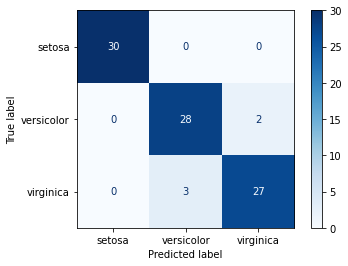

In [34]:
disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(y_train,y_pred_train),
    display_labels=iris_bunch.target_names
    )
disp.plot(values_format='',cmap=plt.cm.Blues)
plt.show()

In [35]:
confusion_matrix(y_test,y_pred_test)

array([[20,  0,  0],
       [ 0, 19,  1],
       [ 0,  1, 19]])

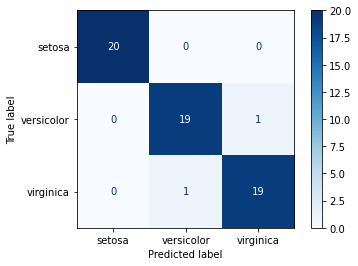

In [36]:
confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(y_test,y_pred_test),
    display_labels=iris_bunch.target_names
    )
disp.plot(values_format='',cmap=plt.cm.Blues)
plt.show()


In [37]:
iris_bunch.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [38]:
print(metrics.classification_report(y_train,y_pred_train, target_names=iris_bunch.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        30
  versicolor       0.90      0.93      0.92        30
   virginica       0.93      0.90      0.92        30

    accuracy                           0.94        90
   macro avg       0.94      0.94      0.94        90
weighted avg       0.94      0.94      0.94        90



In [39]:
print(metrics.classification_report(y_test,y_pred_test, target_names=iris_bunch.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        20
  versicolor       0.95      0.95      0.95        20
   virginica       0.95      0.95      0.95        20

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



In [40]:
model_info = pd.DataFrame(columns=['species' , 'feature' , 'mean' , 'var'])

for feature in range(len(iris_bunch.feature_names)):
  #print(pd.DataFrame(data={'species':iris_bunch.target_names,'feature':iris_bunch.feature_names[feature],'mean':gnb.theta_[:,feature],'var':gnb.sigma_[:,feature]}))
  model_info = model_info.append(pd.DataFrame(data={'species':iris_bunch.target_names,'feature':iris_bunch.feature_names[feature],'mean':gnb.theta_[:,feature],'var':gnb.sigma_[:,feature]}))


model_info['sd'] = np.sqrt(model_info['var'])
model_info

,species,feature,mean,var,sd
0,setosa,sepal length (cm),5.016667,0.166722,0.408316
1,versicolor,sepal length (cm),5.903333,0.256322,0.506283
2,virginica,sepal length (cm),6.646667,0.420489,0.648451
0,setosa,sepal width (cm),3.420000,0.186933,0.432358
1,versicolor,sepal width (cm),2.740000,0.092400,0.303974
2,virginica,sepal width (cm),2.980000,0.116267,0.340979
0,setosa,petal length (cm),1.433333,0.028222,0.167995
1,versicolor,petal length (cm),4.280000,0.228933,0.478470
2,virginica,petal length (cm),5.576667,0.327789,0.572529
0,setosa,petal width (cm),0.243333,0.010456,0.102252
